## Crop Recommendation : A Machine learning Approach
Get personalized crop recommendations using a machine learning algorithm tailored to your local conditions.

The crops included in the dataset are:

- Rice	               
- Maize	              
- Chickpea	           
- Kidney beans         
- Pigeon peas	       
- Moth beans	      
- Mung bean	           
- Black gram	       
- Lentil	           
- Pomegranate	       
- Banana	           
- Mango
- Grapes
- Watermelon
- Muskmelon
- Apple
- Orange
- Papaya
- Coconut

## Collecting & Cleaning Data

In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("Crop_recommendation.csv")

In [3]:
df.head() #first five dfs

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [5]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
df['label'].unique()  #unique types of crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
df.size

17600

In [9]:
df.shape

(2200, 8)

In [10]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [11]:
df.value_counts()

N    P    K    temperature  humidity   ph        rainfall    label      
0    5    36   24.351938    90.886124  6.152907  105.529185  pomegranate    1
69   60   54   36.322681    93.061344  6.989927  141.173693  papaya         1
     37   42   23.058049    83.370118  7.073454  251.055000  rice           1
     46   41   23.641248    80.285979  5.012140  263.110330  rice           1
     47   40   25.371227    76.240367  6.130136  183.827079  jute           1
                                                                           ..
26   126  195  21.413638    92.991245  5.878569  118.397907  apple          1
     122  202  22.445170    94.737635  5.617227  107.184327  apple          1
     121  201  22.191094    90.025751  6.162034  112.312663  apple          1
     80   83   17.084985    16.145658  7.528600  71.310073   chickpea       1
140  45   15   25.530827    80.046628  5.801048  99.395572   cotton         1
Name: count, Length: 2200, dtype: int64

In [12]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### "Since each crop type has an equal number of entries, the dataset is well-balanced."

In [13]:
df.isnull().sum() 

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

### The dataset contains no missing values

### Data Visualisation

Text(0.5, 1.0, 'Temperature Distribution')

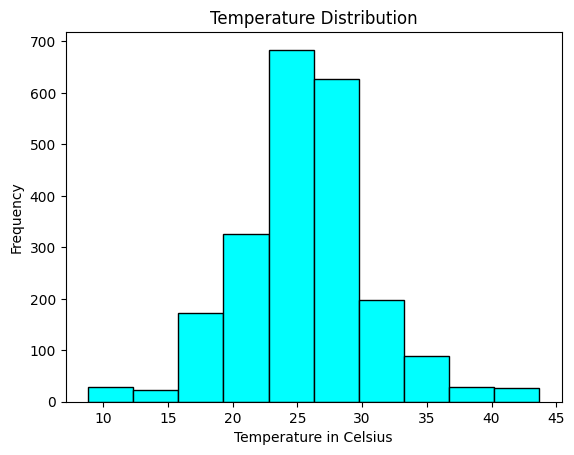

In [14]:
plt.hist(df['temperature'],color="cyan",edgecolor="black")
plt.xlabel("Temperature in Celsius")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")

Text(0.5, 1.0, 'Rainfall Distribution')

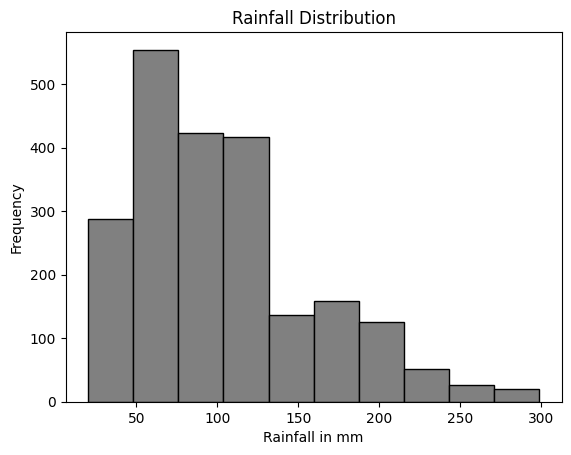

In [15]:
plt.hist(df['rainfall'],color="grey",edgecolor="black")
plt.xlabel("Rainfall in mm")
plt.ylabel("Frequency")
plt.title("Rainfall Distribution")

## Correlations

In [16]:
x=df['rainfall']
y=df['humidity']
y.corr(x)

0.0944230533485546

In [17]:
x=df['rainfall']
y=df['temperature']
y.corr(x)

-0.030083780898041385

In [18]:
x=df['rainfall']
y=df['ph']
y.corr(x)

-0.10906948370282984

In [19]:
x=df['temperature']
y=df['ph']
y.corr(x)

-0.01779501709456344

### Rainfall vs. Humidity:
Correlation Coefficient = 0.0944
✅ Slight positive correlation — as rainfall increases, humidity tends to increase slightly.

### Rainfall vs. Temperature:
Correlation Coefficient = -0.0301
🔻 Very weak negative correlation — a negligible inverse relationship.

### Rainfall vs. pH:
Correlation Coefficient = -0.1091
🔻 Weak negative correlation — as rainfall increases, pH slightly decreases.

### Temperature vs. pH:
Correlation Coefficient = -0.0178
🔻 Very weak negative correlation — almost no relationship.

### Correlation matrix

In [20]:
df_corr=df.drop(columns=['label'])
df_corr.corr()

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


### Heatmap for correlation matrix

In [21]:
df_heatmap=df.drop(columns=["label"]) #dropping string values for plotting a heatmap

<Axes: >

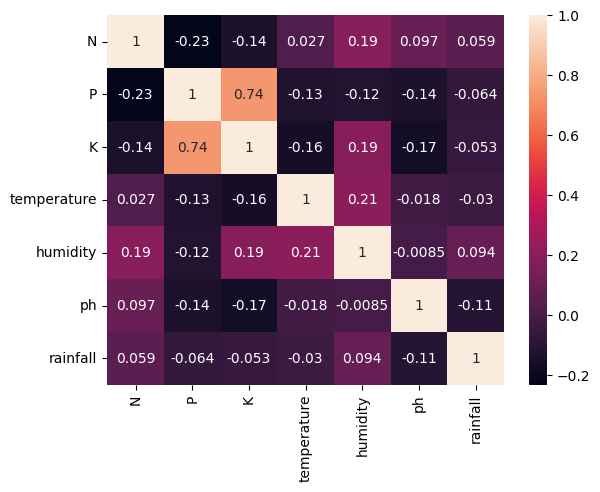

In [22]:
sns.heatmap(df_heatmap.corr(),annot=True)

### Heatmap for rainfall corresponding to each crop

<Axes: xlabel='rainfall', ylabel='label'>

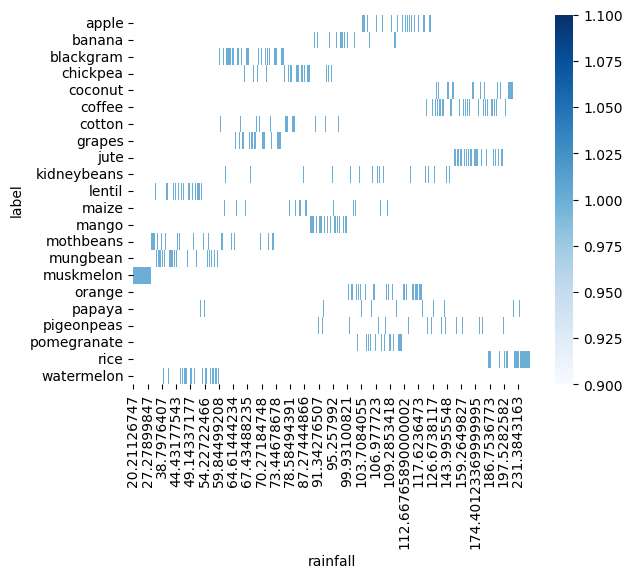

In [23]:
sns.heatmap(df.groupby('label').rainfall.value_counts().fillna(0).unstack(),cmap="Blues")

### Heatmap corresponding to humidity and each crop

<Axes: xlabel='humidity', ylabel='label'>

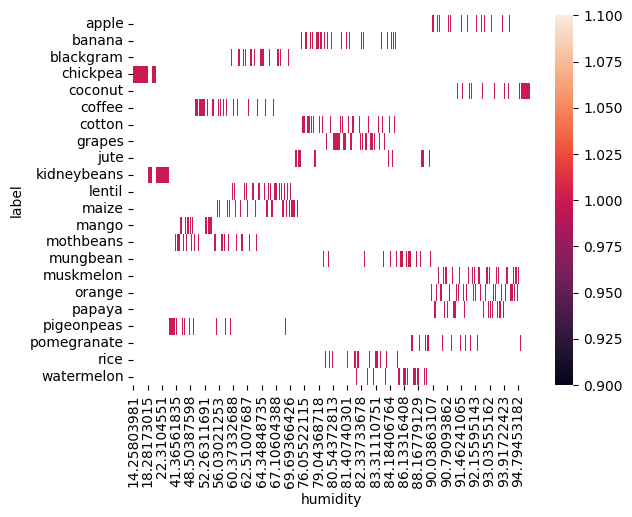

In [24]:
sns.heatmap(df.groupby('label').humidity.value_counts().fillna(0).unstack())

### Pairwise Plot

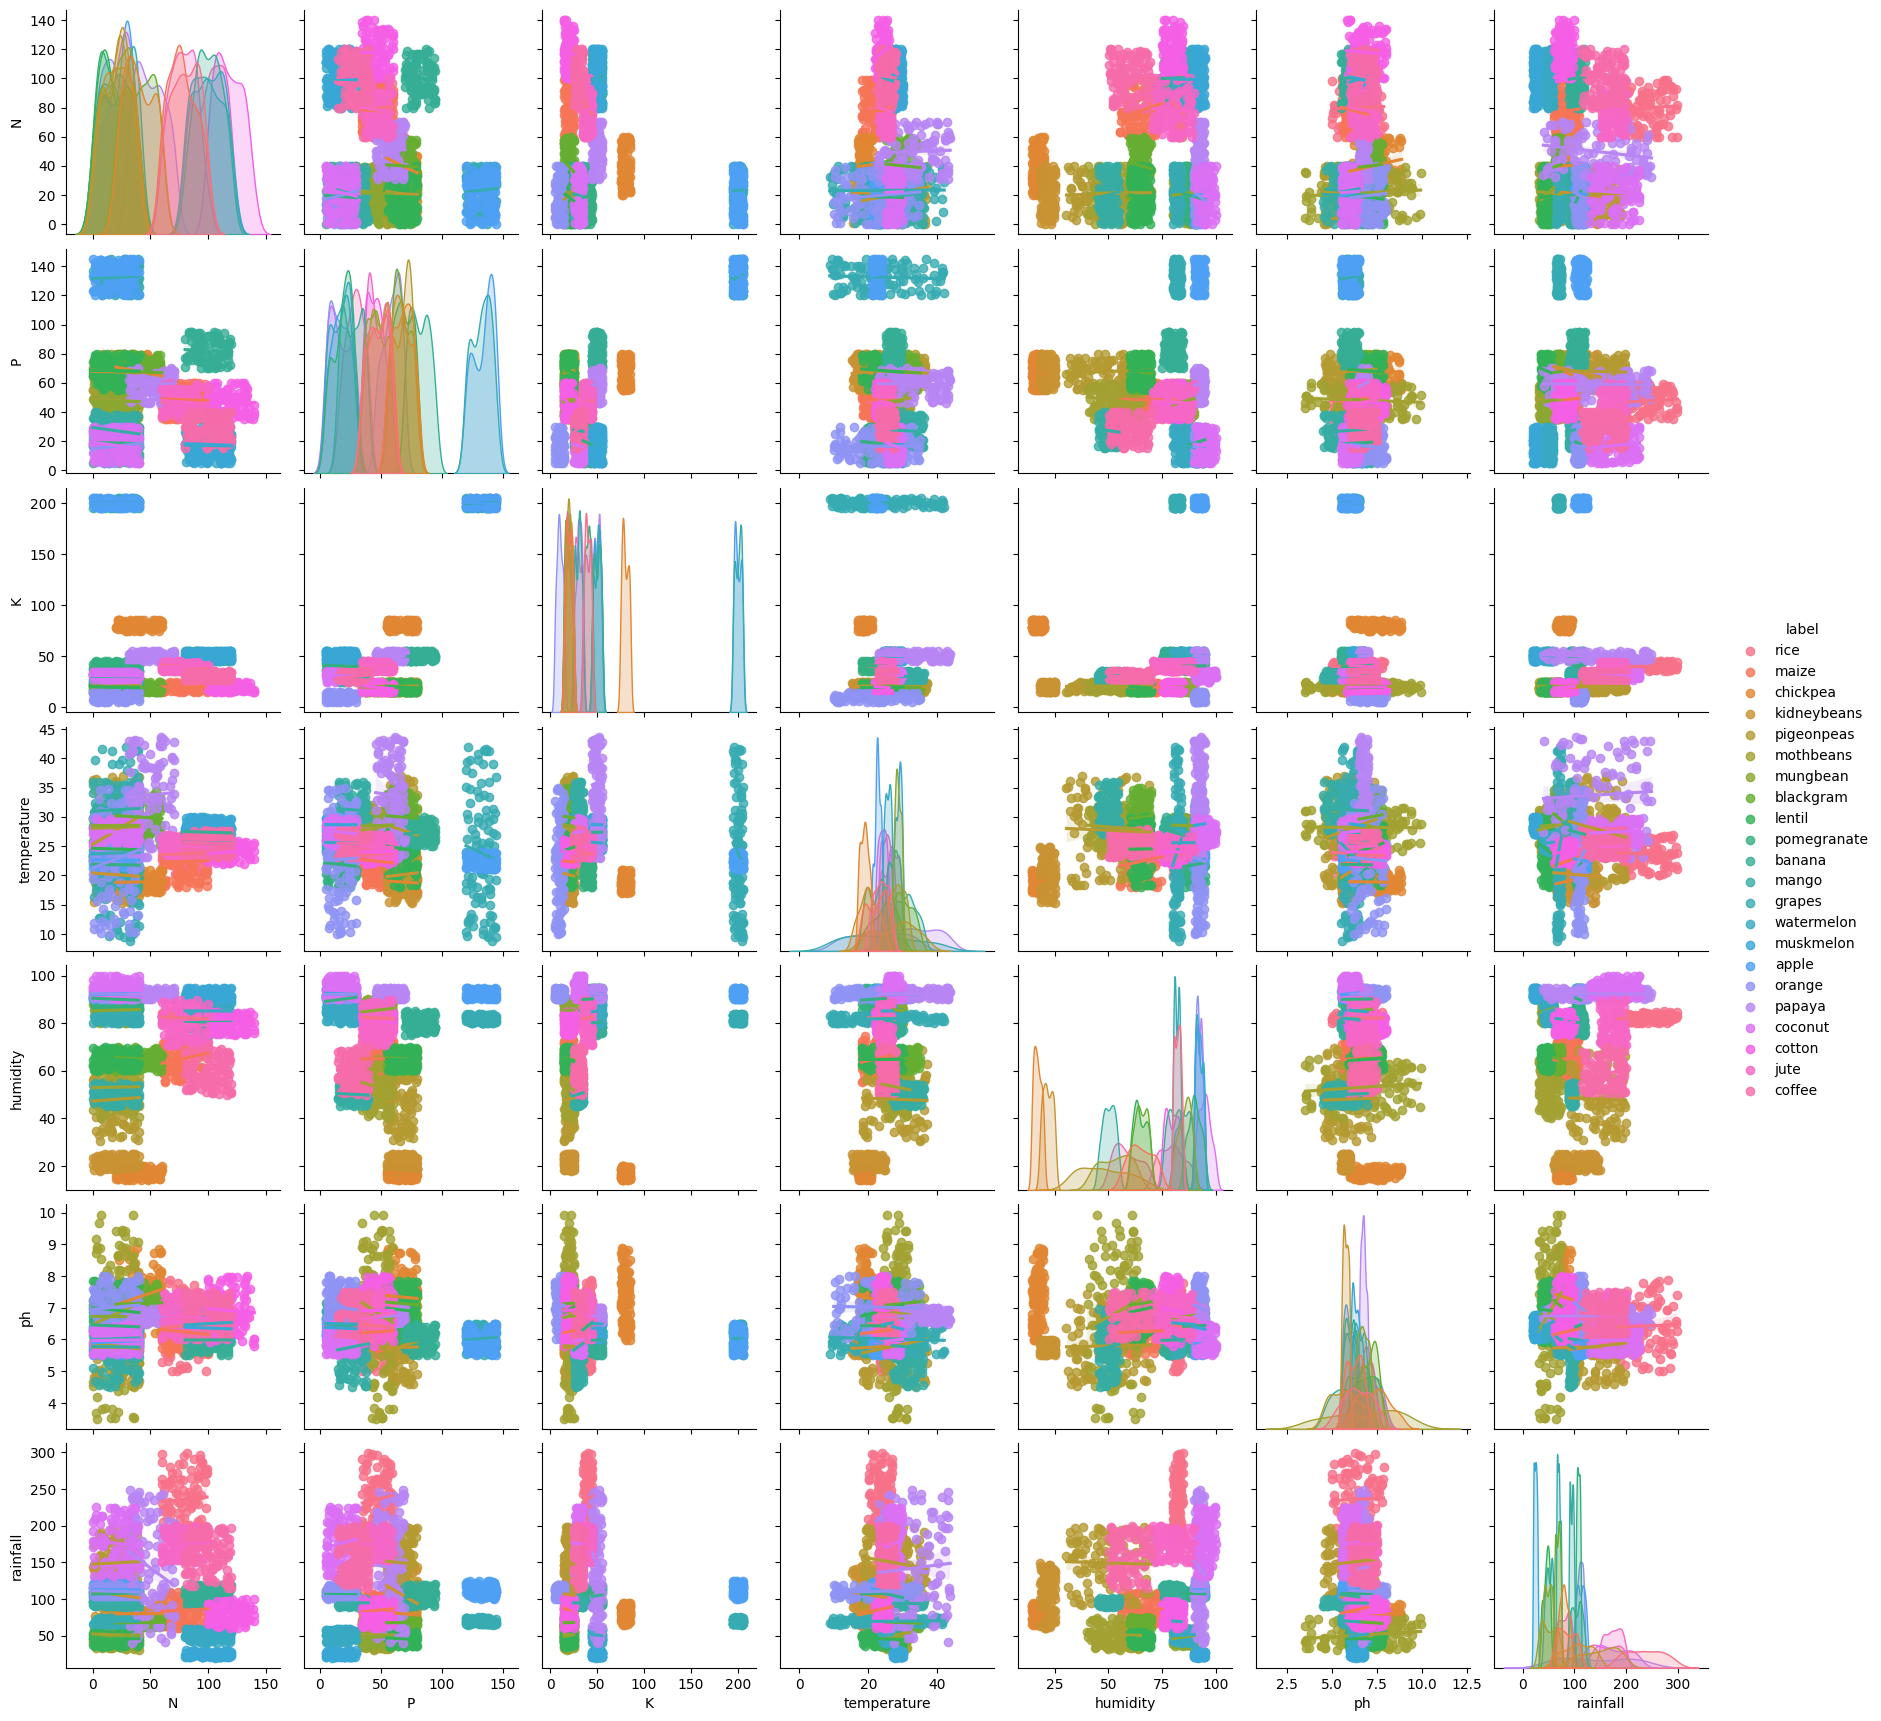

In [25]:
sns.pairplot(df,hue="label",kind="reg")

##  Box Plots

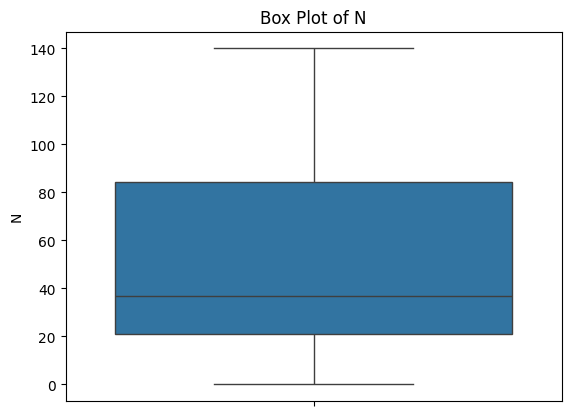

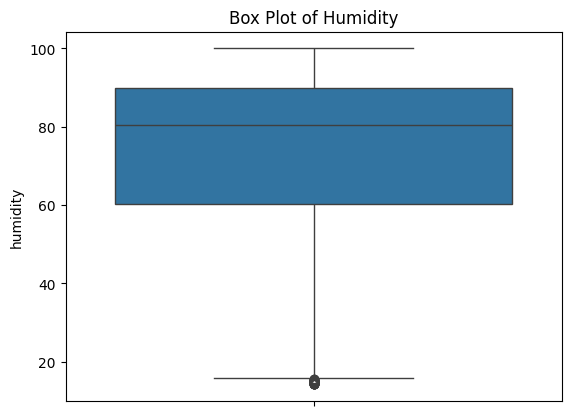

In [26]:

sns.boxplot(data=df['N'])
plt.title('Box Plot of N')
plt.show()


sns.boxplot(data=df['humidity'])
plt.title('Box Plot of Humidity')
plt.show()

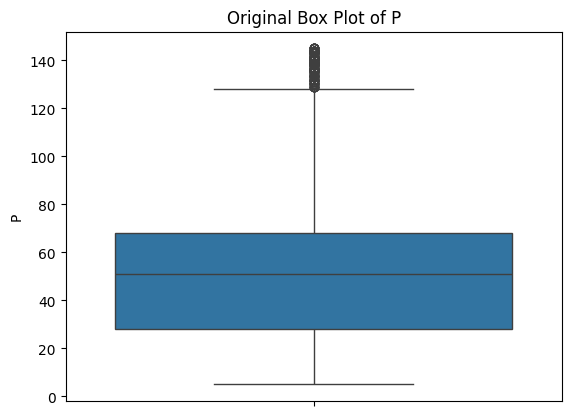

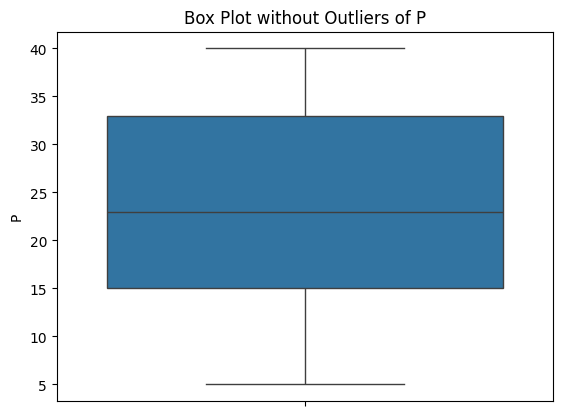

In [27]:
import matplotlib.pyplot as plt
def removal_box_plot(df, column, threshold): 
    sns.boxplot(df[column]) 
    plt.title(f'Original Box Plot of {column}')  
    plt.show()
    removed_outliers = df[df[column] <= threshold]  

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 40

no_outliers = removal_box_plot(df,'P',threshold_value)

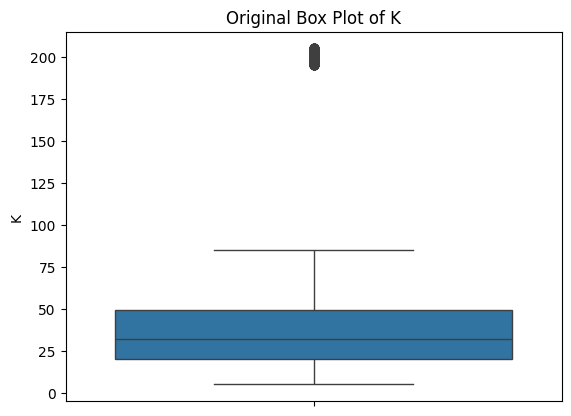

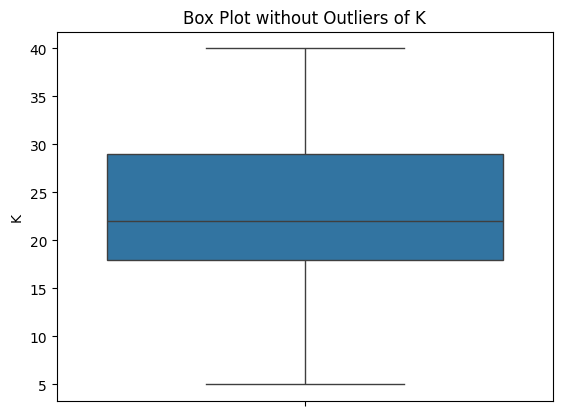

In [28]:
import matplotlib.pyplot as plt
def removal_box_plot(df, column, threshold): 
    sns.boxplot(df[column]) 
    plt.title(f'Original Box Plot of {column}')  
    plt.show()
    removed_outliers = df[df[column] <= threshold]  

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 40

no_outliers = removal_box_plot(df,'K',threshold_value)

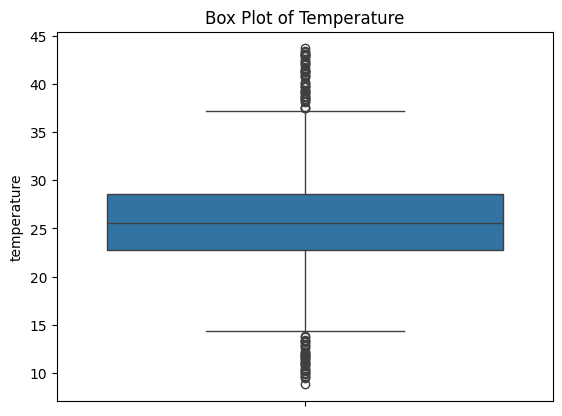

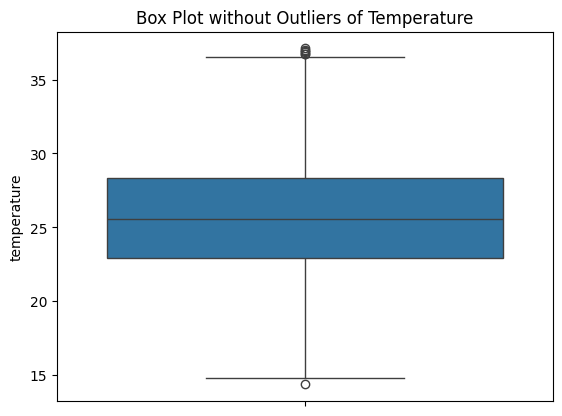

In [29]:
sns.boxplot(data=df['temperature'])
plt.title('Box Plot of Temperature')
plt.show()

Q1 = df['temperature'].quantile(0.25)
Q3 = df['temperature'].quantile(0.75)
IQR = Q3 - Q1
# Filter out outliers
filtered_df = df[(df['temperature'] >= Q1 - 1.5 * IQR) & (df['temperature'] <= Q3 + 1.5 * IQR)]

sns.boxplot(data=filtered_df, y='temperature')
plt.title('Box Plot without Outliers of Temperature')
plt.show()

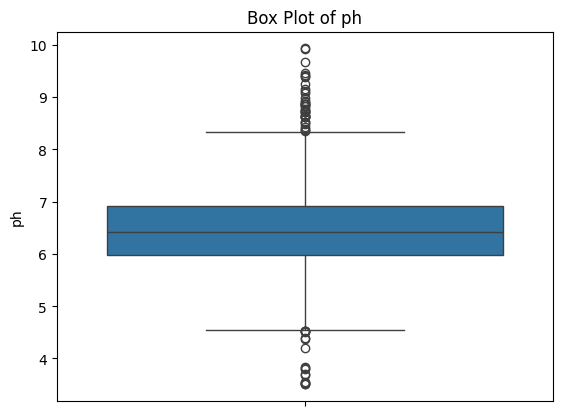

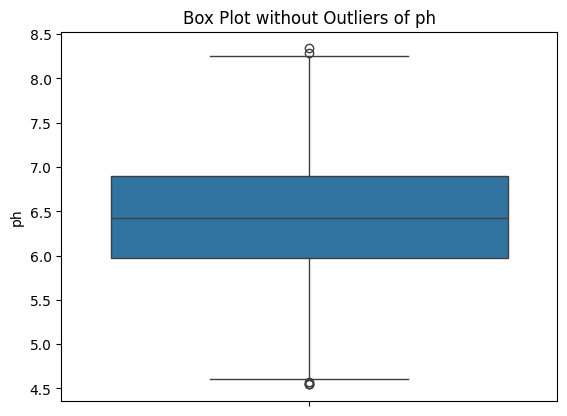

In [30]:
sns.boxplot(data=df['ph'])
plt.title('Box Plot of ph')
plt.show()

Q1 = df['ph'].quantile(0.25)
Q3 = df['ph'].quantile(0.75)
IQR = Q3 - Q1
# Filter out outliers
filtered_df = df[(df['ph'] >= Q1 - 1.5 * IQR) & (df['ph'] <= Q3 + 1.5 * IQR)]

sns.boxplot(data=filtered_df, y='ph')
plt.title('Box Plot without Outliers of ph')
plt.show()

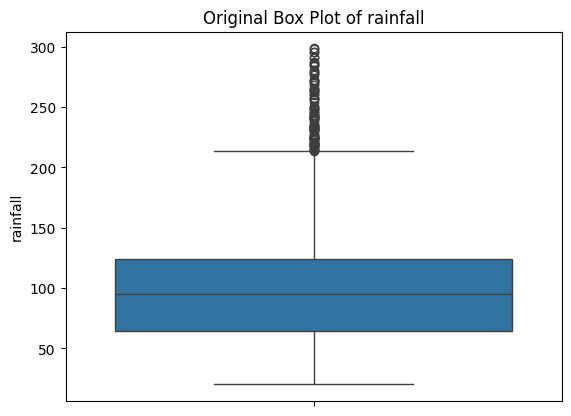

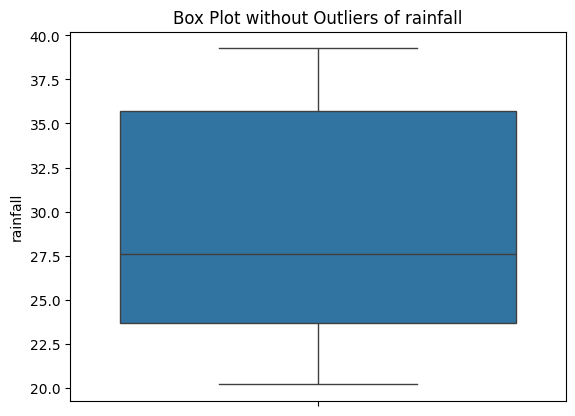

In [31]:
import matplotlib.pyplot as plt
def removal_box_plot(df, column, threshold): 
    sns.boxplot(df[column]) 
    plt.title(f'Original Box Plot of {column}')  
    plt.show()
    removed_outliers = df[df[column] <= threshold]  

    sns.boxplot(removed_outliers[column])
    plt.title(f'Box Plot without Outliers of {column}')
    plt.show()
    return removed_outliers


threshold_value = 40

no_outliers = removal_box_plot(df,'rainfall',threshold_value)

In [32]:
# write final df to csv file
df.to_csv('crop_df.csv')